In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

%matplotlib inline
figsize = (10, 4)

## Retorno de um papel

Calculando o retorno do FII _MALL11_ que considera os valores ajustados desde 01/01/2019.

Uma primeira abordagem é a de *retorno simples*, onde:

$$
\frac{P_d-P_{d-1}}{P_{d-1}} = \frac{P_d}{P_{d-1}}-1
$$

Existe ainda o *retorno logarítmico* que é normalmente aplicado para se avaliar o comportamento de apenas um papel, onde:

$$
ln\left(\frac{P_d}{P_{d-1}}\right)
$$

In [73]:
mall11 = wb.DataReader('MALL11.SA', data_source='yahoo', start='2019-01-01')
mall11['simple_return'] = (mall11['Adj Close'] / mall11['Adj Close'].shift(1))-1
mall11['log_return'] = np.log(mall11['Adj Close'] / mall11['Adj Close'].shift(1))
mall11

,High,Low,Open,Close,Volume,Adj Close,simple_return,log_return
Date,,,,,,,,
2019-01-02,109.989998,104.000000,107.730003,106.500000,11282.0,106.500000,NaN,NaN
2019-01-03,106.500000,105.059998,106.470001,105.910004,9283.0,105.910004,-0.005540,-0.005555
2019-01-04,106.500000,105.690002,106.300003,106.000000,10123.0,106.000000,0.000850,0.000849
2019-01-07,106.000000,105.190002,106.000000,105.940002,14778.0,105.940002,-0.000566,-0.000566
2019-01-08,106.000000,105.199997,105.989998,105.760002,12692.0,105.760002,-0.001699,-0.001701
...,...,...,...,...,...,...,...,...
2021-06-02,99.000000,97.010002,97.830002,97.690002,16882.0,97.690002,-0.001329,-0.001330
2021-06-04,99.599998,97.610001,97.690002,99.400002,13824.0,99.400002,0.017504,0.017353
2021-06-07,100.000000,99.300003,99.699997,99.300003,13701.0,99.300003,-0.001006,-0.001007


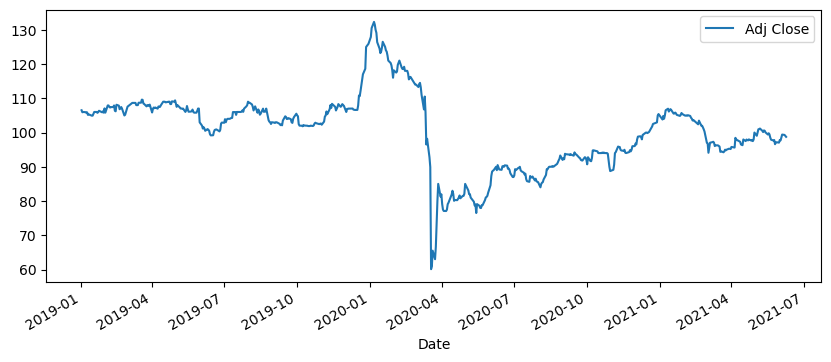

In [35]:
mall11.plot(y='Adj Close', figsize=figsize);

## Múltiplos papéis

Imagine pegar os valores ajustados de FII's logísticos desde 01/01/2019.

In [76]:
df = pd.DataFrame()
logistico = {'ALZR11', 'XPLG11', 'VILG11', 'BTLG11', 'HGLG11', 'GGRC11'}

for t in logistico:
    papel = f"{t}.SA"
    print('.', end='')
    df[papel] = wb.DataReader(papel, data_source='yahoo', start='2019-01-01')['Adj Close']

......

In [77]:
display(df.head(), df.tail())

,VILG11.SA,BTLG11.SA,GGRC11.SA,ALZR11.SA,XPLG11.SA,HGLG11.SA
Date,,,,,,
2019-03-19,111.000000,96.300003,131.339996,98.500000,NaN,160.000000
2019-03-20,109.000000,97.989998,130.889999,98.480003,NaN,159.899994
2019-03-21,109.300003,97.980003,130.699997,97.970001,NaN,159.899994
2019-03-22,108.000000,97.949997,130.009995,97.800003,NaN,159.690002
2019-03-25,111.000000,98.570000,130.059998,97.519997,NaN,159.990005


,VILG11.SA,BTLG11.SA,GGRC11.SA,ALZR11.SA,XPLG11.SA,HGLG11.SA
Date,,,,,,
2021-06-02,116.099998,112.879997,120.000000,128.000000,114.099998,169.899994
2021-06-04,117.070000,113.000000,122.510002,124.690002,114.389999,170.479996
2021-06-07,116.199997,113.849998,122.220001,125.000000,113.980003,166.889999
2021-06-08,118.190002,112.989998,123.349998,124.000000,113.800003,165.399994
2021-06-09,117.900002,113.959999,123.300003,121.900002,113.860001,167.020004


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2019-03-19 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VILG11.SA  550 non-null    float64
 1   BTLG11.SA  550 non-null    float64
 2   GGRC11.SA  550 non-null    float64
 3   ALZR11.SA  549 non-null    float64
 4   XPLG11.SA  249 non-null    float64
 5   HGLG11.SA  550 non-null    float64
dtypes: float64(6)
memory usage: 30.1 KB


In [79]:
df.describe()

,VILG11.SA,BTLG11.SA,GGRC11.SA,ALZR11.SA,XPLG11.SA,HGLG11.SA
count,550.000000,550.000000,550.000000,549.000000,249.000000,550.000000
mean,120.713091,105.195672,135.124309,118.093898,122.532570,170.102836
std,8.974701,6.835071,9.662502,12.972371,6.219658,13.764212
min,88.000000,76.000000,94.000000,83.510002,112.040001,117.050003
25%,114.204998,103.379997,130.747498,105.989998,116.000000,158.882504
50%,120.744999,105.255001,137.070000,123.099998,122.750000,170.629997
75%,125.487499,109.339996,142.000000,128.089996,128.020004,178.744999
max,151.000000,118.529999,151.089996,148.990005,135.500000,221.139999


De diferente formas podemos visualizar as contações obtidas.

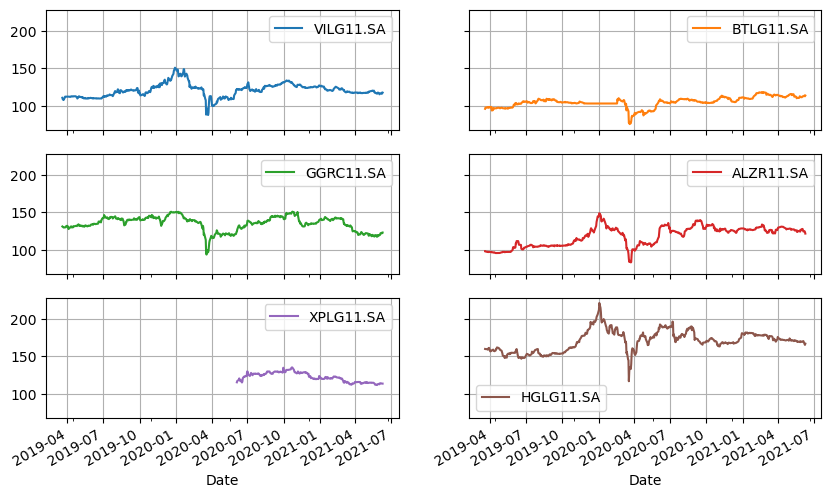

In [80]:
df.plot(subplots=True, grid=True, sharex=True, sharey=True, layout=(3, 2), figsize=(10, 6));

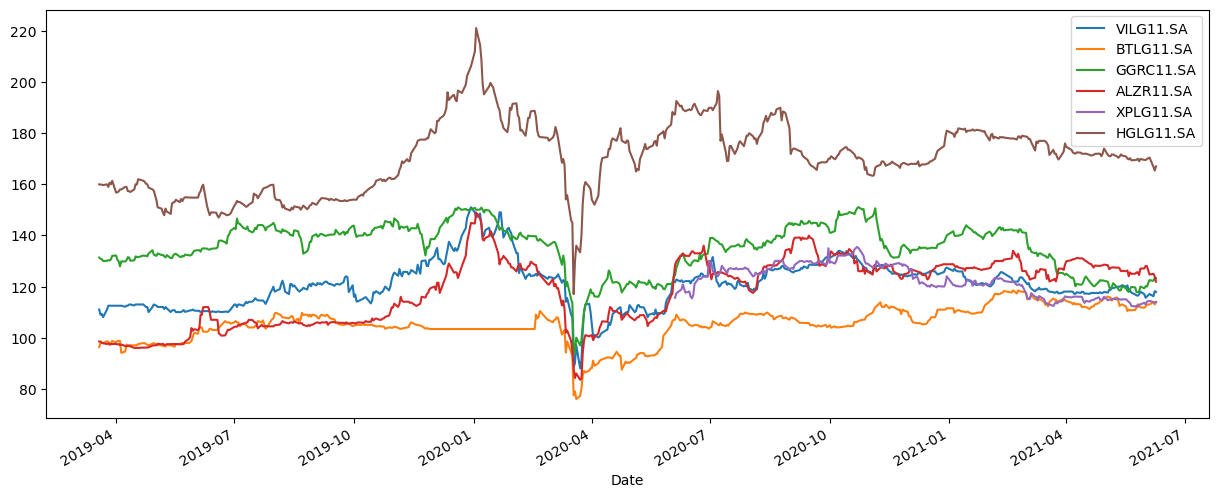

In [81]:
df.plot(legend=True, figsize=(15, 6));

... embora faça muito mais sentido vermos os dados normalizados ...

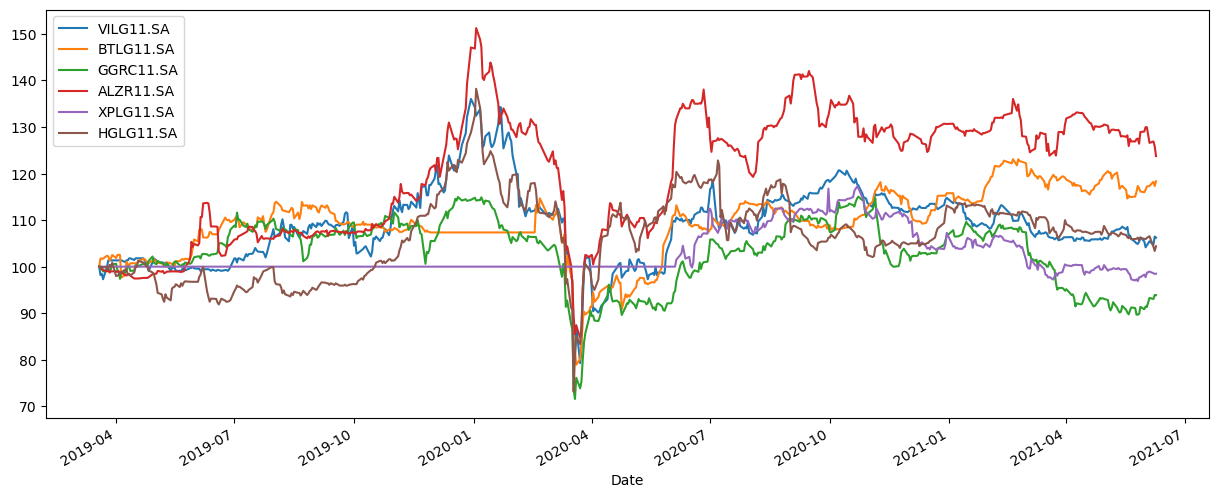

In [82]:
df.fillna(method='bfill', inplace=True)
(df / df.iloc[0]* 100).plot(figsize=(15, 6));

Qual seria o retorno anualizado de cada um do fundos? (considere 250 dias úteis no mês)

In [83]:
anual = df.mean() * 250
anual

VILG11.SA    30178.272729
BTLG11.SA    26298.918082
GGRC11.SA    33781.077264
ALZR11.SA    29517.940851
XPLG11.SA    29686.009147
HGLG11.SA    42525.709104
dtype: float64

In [84]:
simple_return = (df / df.shift(1))-1
log_retorn = np.log(df / df.shift(1))

In [85]:
simple_return[simple_return.columns].mean() * 250 * 100

VILG11.SA     6.371940
BTLG11.SA     9.832313
GGRC11.SA    -0.556775
ALZR11.SA    12.349855
XPLG11.SA    -0.168800
HGLG11.SA     5.526386
dtype: float64